# Commercial Water Cconsumption Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

# sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(20, 8)})

In [2]:
# Retrieve File
file='Data/austin-water-commercial-water-consumption-1.csv'
df = pd.read_csv(file)
df.head()

,Year Month,Postal Code,Customer Class,Total Gallons
0,201210,78736,Irrigation - Commercial,342600
1,201705,78741,Irrigation - Commercial,2955100
2,201702,78726,City of Austin,9000
3,201309,78704,Irrigation - City of Austin,223000
4,201705,78758,Irrigation - City of Austin,0


In [3]:
# Convert Year Month into Time
df['Year Month'] = df['Year Month'].apply(lambda x: f"{x}01") # append default day to string
df['Year Month'] = pd.to_datetime(df['Year Month'])
df.head()

,Year Month,Postal Code,Customer Class,Total Gallons
0,2012-10-01,78736,Irrigation - Commercial,342600
1,2017-05-01,78741,Irrigation - Commercial,2955100
2,2017-02-01,78726,City of Austin,9000
3,2013-09-01,78704,Irrigation - City of Austin,223000
4,2017-05-01,78758,Irrigation - City of Austin,0


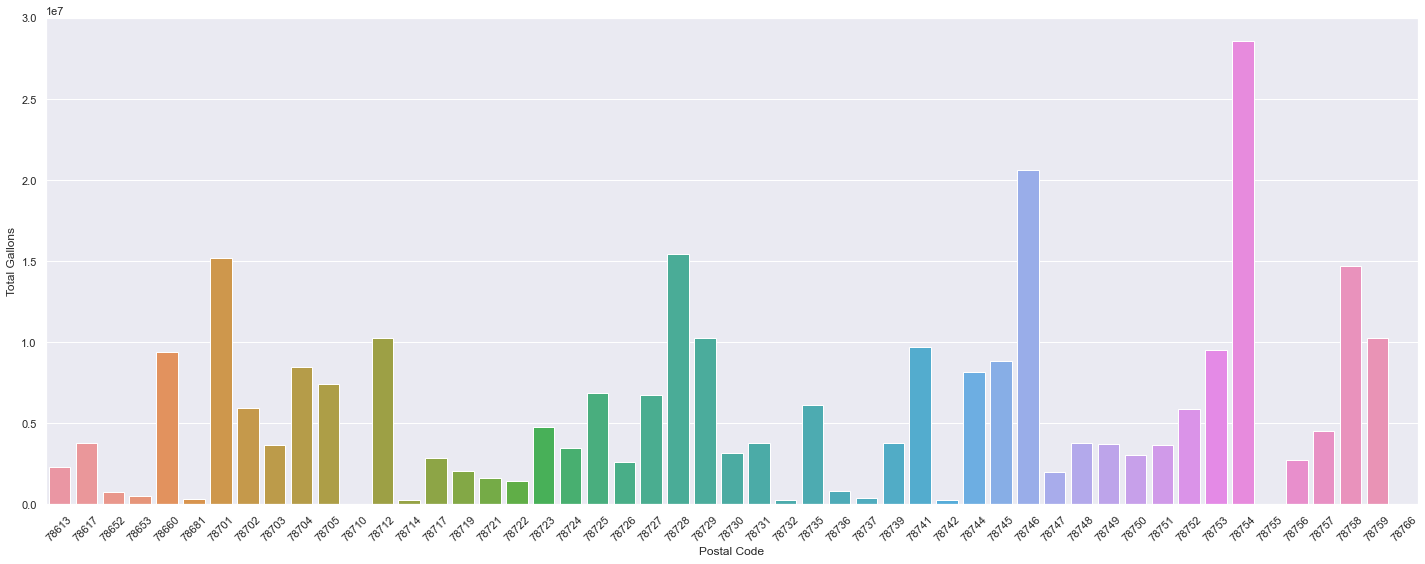

In [4]:
# How many datapoints are in each Postal Code
df_postal = df.groupby('Postal Code').size()

# Total Gallons per Area
locations = df.groupby(df['Postal Code'])
ave_per_location = pd.DataFrame(locations.mean()).reset_index(level=0) # put mean gallons for each location in dataframe and make postal code into a DF column
sns.barplot(data=ave_per_location, x='Postal Code', y='Total Gallons')
plt.xticks(rotation=45)
plt.tight_layout()

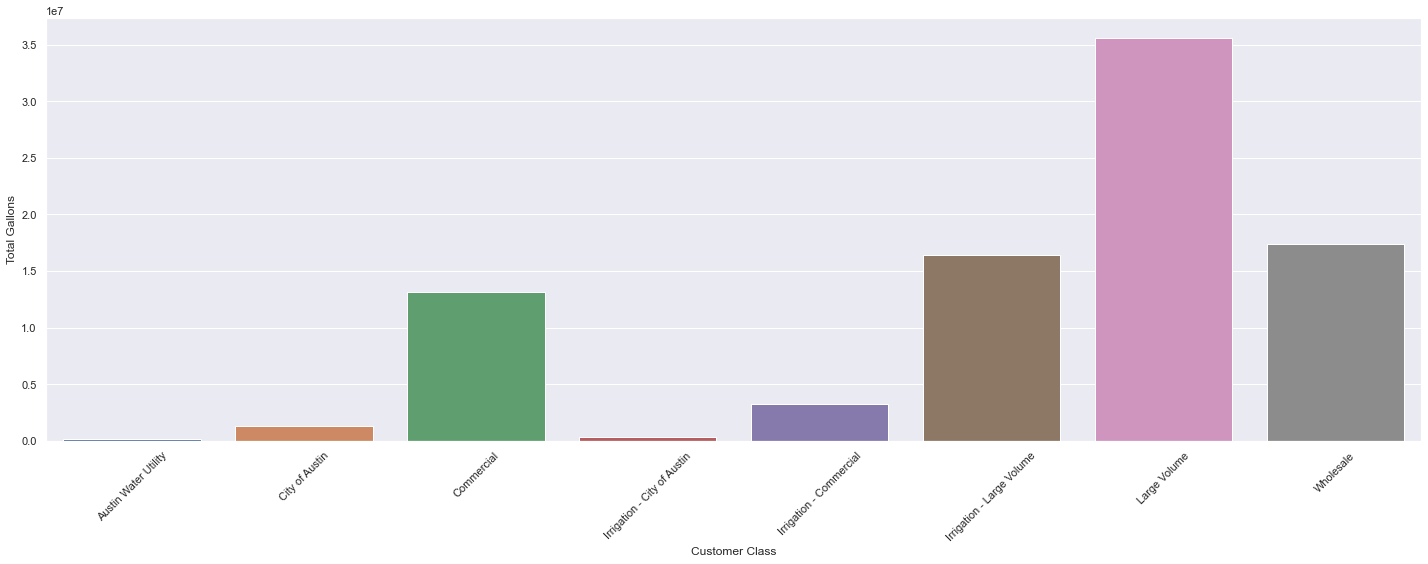

In [79]:
# How many datapoints are in each Customer Class
df_class = df.groupby('Customer Class').size()
df_class.head()

# Total Gallons per Customer Class 
locations = df.groupby(df['Customer Class'])
ave_per_location = pd.DataFrame(locations.mean()).reset_index(level=0) # put mean gallons for each location in dataframe and make Customer Class into a DF column
sns.barplot(data=ave_per_location, x='Customer Class', y='Total Gallons')
plt.xticks(rotation=45)
plt.tight_layout()

MultiIndex([('Total Gallons',        'Austin Water Utility'),
            ('Total Gallons',              'City of Austin'),
            ('Total Gallons',                  'Commercial'),
            ('Total Gallons', 'Irrigation - City of Austin'),
            ('Total Gallons',     'Irrigation - Commercial'),
            ('Total Gallons',   'Irrigation - Large Volume'),
            ('Total Gallons',                'Large Volume'),
            ('Total Gallons',                   'Wholesale')],
           names=[None, 'Customer Class'])


<AxesSubplot:xlabel='Postal Code'>

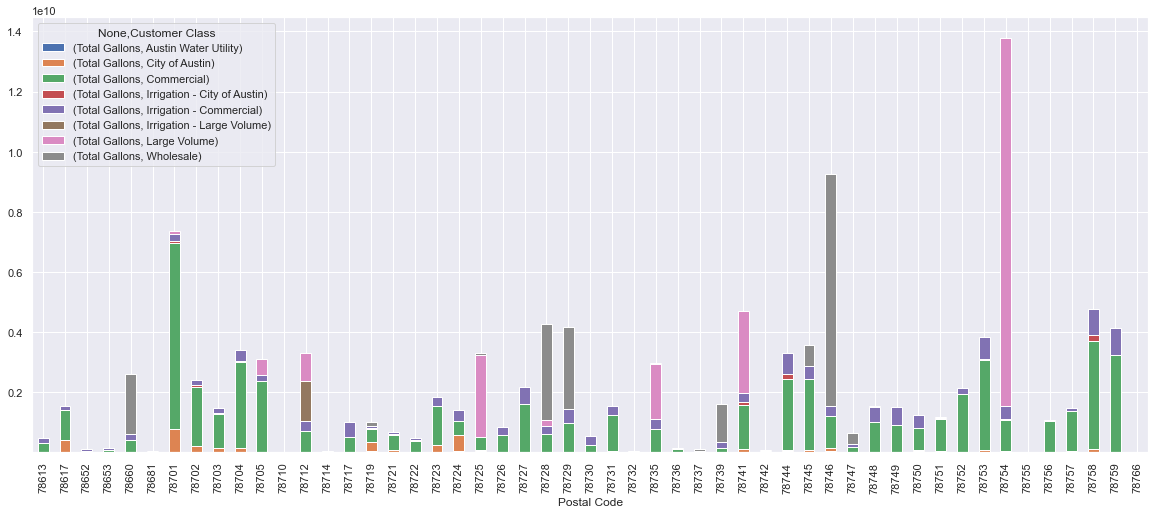

In [77]:
# How many customer class in each postal code
df_postal_class = df.groupby(['Postal Code', 'Customer Class']).sum()
# df_postal_class.replace(np.nan, 0)

df_postal_class = df_postal_class.reset_index().pivot('Postal Code', 'Customer Class')    # pivot table to make customer class as columns
# df_postal_class.droplevel(level='None') #TODO drop 0 Dimension
print(df_postal_class.columns)
# print(df_postal_class)

# Total Gallons per Area with Contribution from each Class
df_postal_class.plot(kind='bar', stacked=True)

(array([504, 516, 528, 540, 552, 564, 576]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

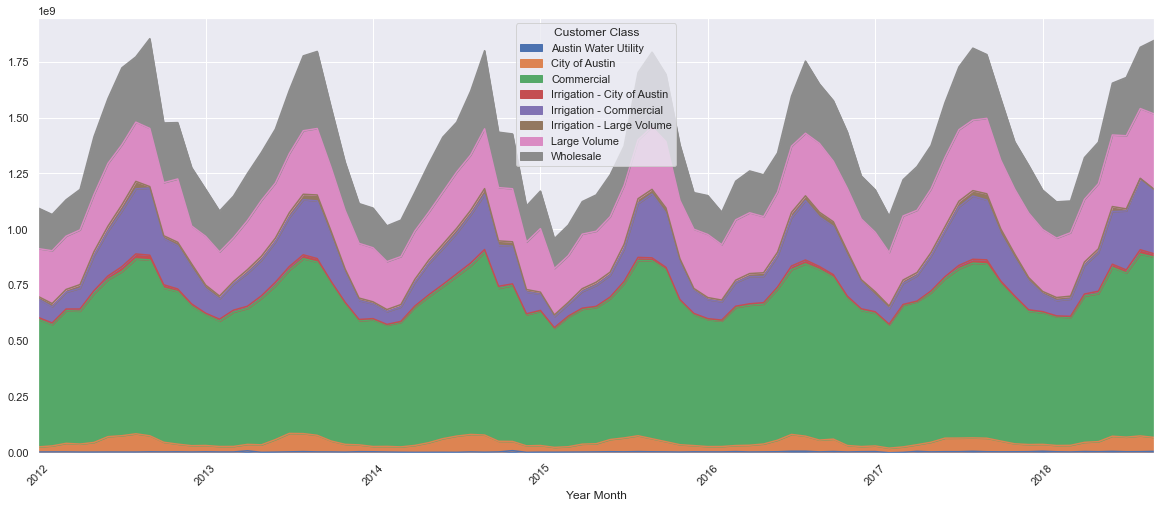

In [86]:
# Graph with time
df_date = df.groupby(['Year Month', 'Customer Class']).sum()
df_date = df_date.reset_index().pivot('Year Month', 'Customer Class')    # pivot table to make customer class as columns
# print(df_date)

df_date.plot.area(y='Total Gallons')
plt.xticks(rotation=45)